# More Basics of Image Processing

## Basic Setup

In [17]:
# Importing basic libraries
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

IMAGES_DIR = "images"

In [18]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Erosion and Dilation

### Isolate the structure
Try to isolate the middle square `structure.jpeg` so that it looks like `structure_isolated.jpeg`

In [7]:
# Write your solution here

Shape of grayscale image : (486, 486)


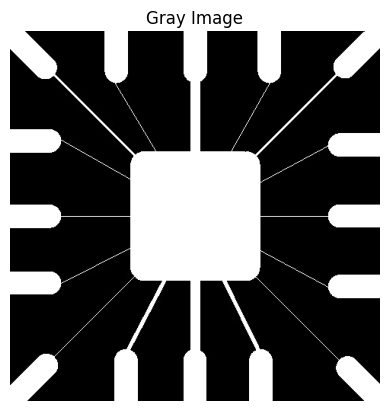

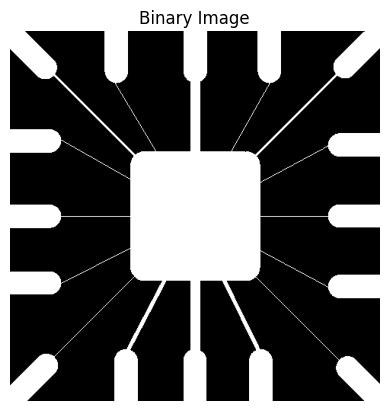

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


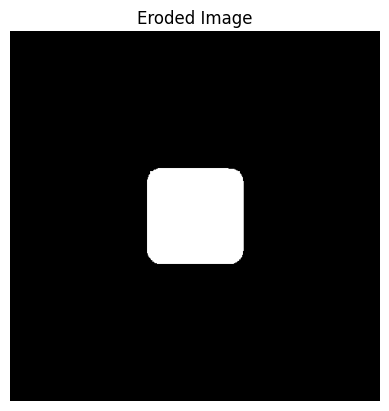

In [8]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "structure.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Shape of grayscale image : {gray_image.shape}")
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
show_image(binary_image, "Binary Image")

# Define the structuring element
ksize = 45 # kernel size for Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))
print(kernel)

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

### Fix the Broken Text
Read `text_broken.jpeg` and try to fix the broken characters so it looks closer to `text_fixed.jpeg`

In [9]:
# Write your solution here

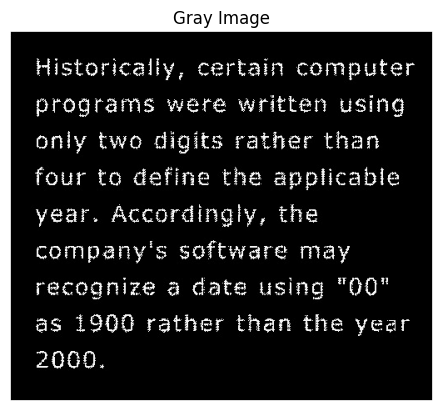

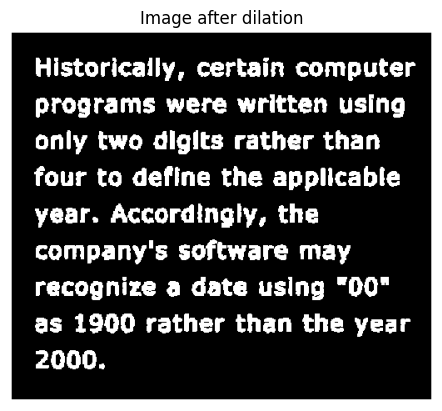

In [10]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Image after dilation")

Now, can you segmwnt out the words in the image? Hint: play around different Structuring Elements.

In [ ]:
# Write your solution here

### Remove Noise from fingerprint
Try to remove the background noise from `fingerprint_noise.jpeg` while preserving as much of the fingerprint as possible.

In [ ]:
# Write your solution here

### Fill the Holes
Fill the holes in `blobs.jpeg` without changing the size of the blobs roughly.

In [ ]:
# Write your solution here

## Gradients, Edges and Blurring

### Sobel Filter
Apply Sobel filter in X and Y directions on `lotus.jpg` and display it's result. Also find the magnitude of the gradient and plot that as well.

In [ ]:
# Write your solution here

### Blurring
Apply Gaussian blurring on `lotus.jpg`

In [ ]:
# Write your solution here

## Bit Quantization

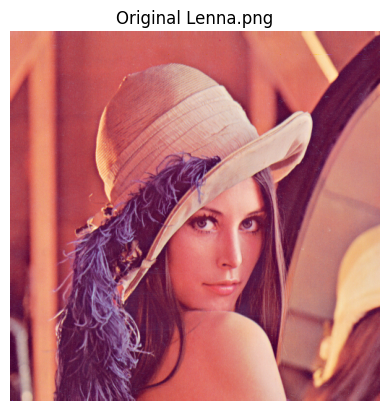

In [22]:
lenna = cv2.imread(os.path.join(IMAGES_DIR, "lena.png"))
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

plt.imshow(lenna)
plt.axis("off")
plt.title("Original Lenna.png")
plt.show()

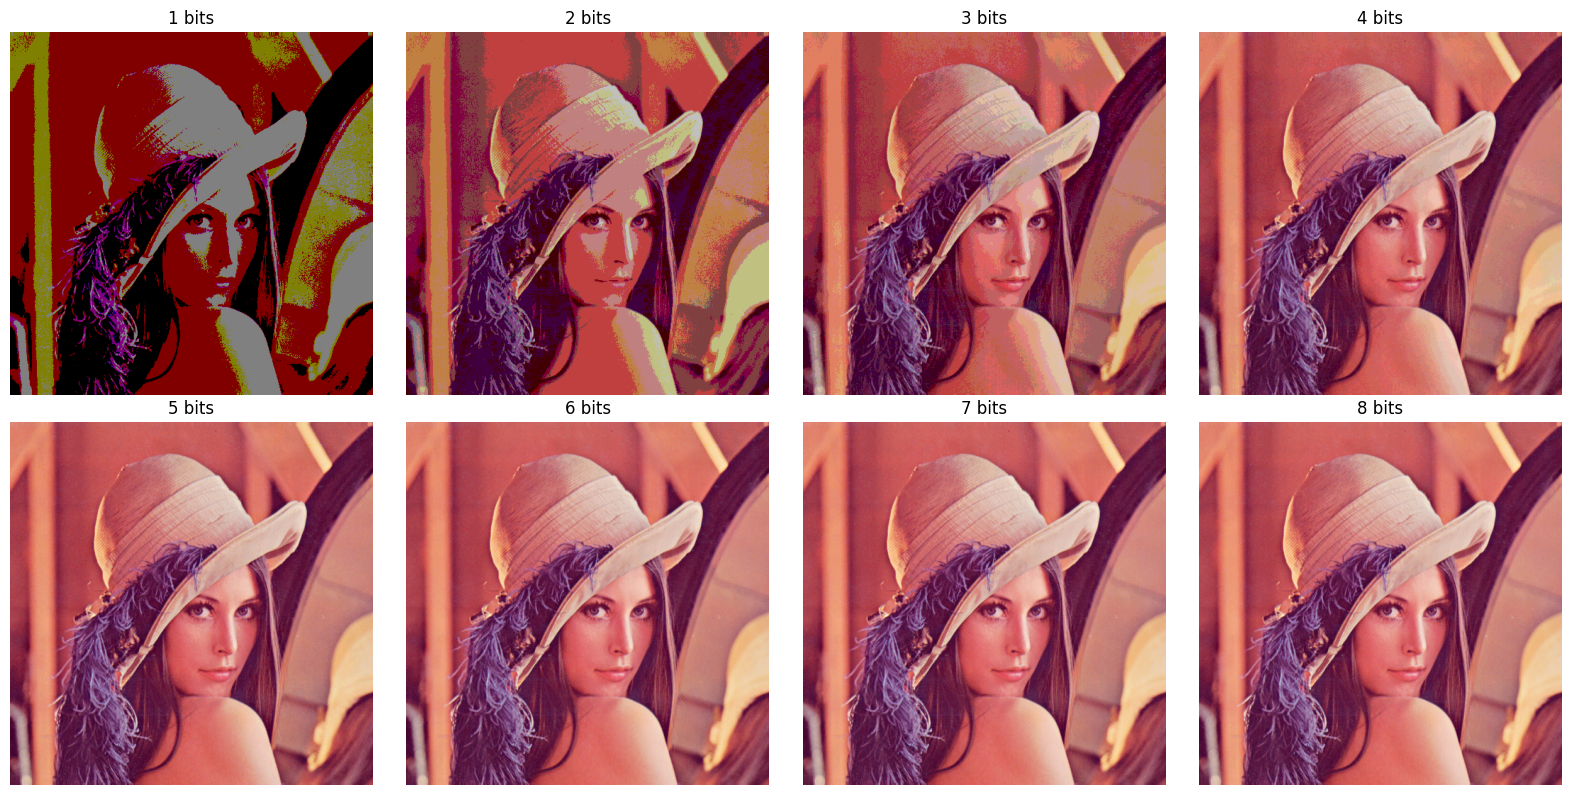

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

def quantize(image, num_of_bits):
    quantized_image = image >> (8-num_of_bits)
    quantized_image = quantized_image << (8-num_of_bits)
    return quantized_image.astype(np.uint8)
    

for i in range(8):
    num_of_bits = i + 1
    quantized_image = quantize(lenna, num_of_bits)
    cv2.imwrite(f"out_img/Question1/Lenna_{num_of_bits}_bits.png", cv2.cvtColor(quantized_image, cv2.COLOR_RGB2BGR))
    axes[i].imshow(quantized_image)
    axes[i].set_title(f"{num_of_bits} bits")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Can you see that the image is not much changed even when represented with lesser number of bits? Can we use this to embed an image into another?

### Image encryption and decryption

The encrypted.png image of Taj Mahal contains one more wonder of the world. Can you find it? The image is encrypted using a simple bit quantization technique. Try to decrypt it and find the hidden image.

In [ ]:
# Write your solution here

Take any 2 images and encrypt one into another using the same technique. Display the encrypted image and the decrypted image.

In [ ]:
# Write your solution here
